<a href="https://colab.research.google.com/github/LeonardCT/palletsAndina/blob/main/SAMvsFASTSAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Oct 17 19:17:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
import sys

In [3]:
HOME= os.getcwd()
print("Home:",HOME)

Home: /content


In [4]:
%cd {HOME}

!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-yq1okpuw
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-yq1okpuw
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


In [5]:

!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision

In [6]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'

/content
mkdir: cannot create directory ‘/content/weights’: File exists
/content/weights


In [7]:
CHECKPOINT_PATH= os.path.join(HOME, "weights",'sam_vit_h_4b8939.pth')
print(CHECKPOINT_PATH, ";exist", os.path.isfile(CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ;exist True


In [8]:
import torch
DEVICE= torch.device('cuda:0' if torch.cuda.is_available() else'cpu')
MODEL_TYPE='vit_h'

In [9]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [11]:
mask_generator= SamAutomaticMaskGenerator(sam)

In [12]:
import os

%cd {HOME}

IMAGE_PATH = f"{HOME}/data/666.png"

/content


In [13]:
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)


sam_result = mask_generator.generate(image_rgb)

SAM PARA UN PALLET QUE ESTA BUENO.

In [14]:
print(sam_result[0].keys())

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


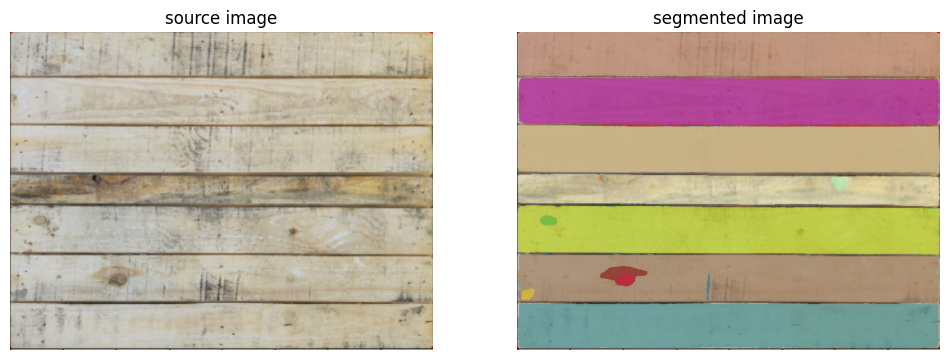

In [15]:
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)


mask_annotator = sv.MaskAnnotator(color_map='index')

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [16]:
filtered_results = [result for result in sam_result if result['area'] > 43000]

for result in filtered_results:
    area = result['area']
    print(f"Área del objeto: {area} píxeles")

Área del objeto: 44094 píxeles
Área del objeto: 44414 píxeles
Área del objeto: 44907 píxeles
Área del objeto: 44251 píxeles
Área del objeto: 46456 píxeles
Área del objeto: 45923 píxeles
Área del objeto: 45871 píxeles
Área del objeto: 46612 píxeles
Área del objeto: 45904 píxeles
Área del objeto: 46120 píxeles
Área del objeto: 46595 píxeles
Área del objeto: 46825 píxeles
Área del objeto: 93472 píxeles


**FILTRADO DE LAS MASCARAS DE MAYOR TAMANO**



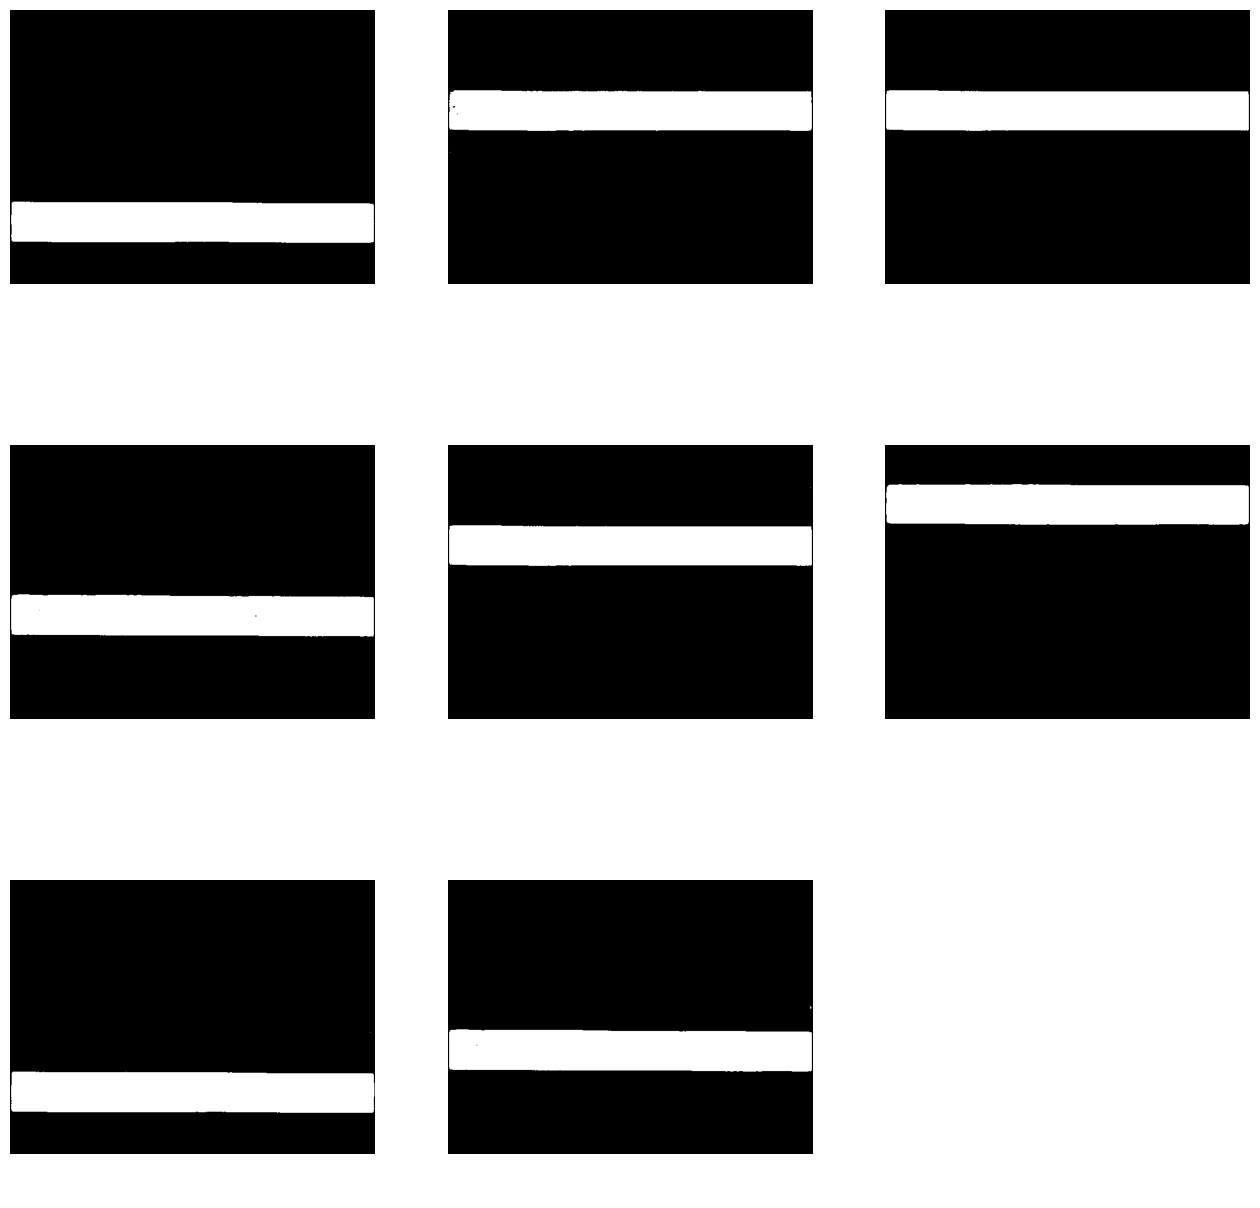

In [17]:
import math
import supervision as sv

# ...

# Filtra las segmentaciones según el área
filtered_results = [result for result in sam_result if 45000 < result['area'] <= 50000]

# Obtén las máscaras de las segmentaciones filtradas
filtered_masks = [result['segmentation'] for result in filtered_results]

# Calcula el tamaño de la cuadrícula para mostrar las máscaras
grid_size_dimension = math.ceil(math.sqrt(len(filtered_masks)))

# Muestra solo las máscaras que cumplen con el criterio de área en una cuadrícula
sv.plot_images_grid(images=filtered_masks, grid_size=(grid_size_dimension, grid_size_dimension), size=(16, 16))



FAST SAM CON PALLET BUENO


In [18]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


In [19]:
%cd {HOME}

# install FastSAM
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git
!pip -q install -r FastSAM/requirements.txt
# install CLIP
!pip -q install git+https://github.com/openai/CLIP.git
# install SAM
!pip -q install git+https://github.com/facebookresearch/segment-anything.git
# install other dependencies
!pip -q install roboflow supervision jupyter_bbox_widget

/content
fatal: destination path 'FastSAM' already exists and is not an empty directory.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


## descarga de los pesos

In [162]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt
!wget -P {HOME}/weights -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
!ls -lh {HOME}/weights

total 7.4G
-rw-r--r-- 1 root root 139M Jun 20 07:01 FastSAM.pt
-rw-r--r-- 1 root root 2.4G Apr  4  2023 sam_vit_h_4b8939.pth
-rw-r--r-- 1 root root 2.4G Apr  4  2023 sam_vit_h_4b8939.pth.1
-rw-r--r-- 1 root root 2.4G Apr  4  2023 sam_vit_h_4b8939.pth.2


In [20]:
FAST_SAM_CHECKPOINT_PATH = f"{HOME}/weights/FastSAM.pt"
SAM_SAM_CHECKPOINT_PATH = f"{HOME}/weights/sam_vit_h_4b8939.pth"

In [21]:
%cd {HOME}/FastSAM

import os
import cv2
import torch
import roboflow
import base64

import supervision as sv
import numpy as np

from roboflow import Roboflow
from fastsam import FastSAM, FastSAMPrompt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

/content/FastSAM


In [22]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

fast_sam = FastSAM(FAST_SAM_CHECKPOINT_PATH)

In [25]:
IMAGE_PATH = f"{HOME}/data/666.png"

In [26]:
results = fast_sam(
    source=IMAGE_PATH,
    device=DEVICE,
    retina_masks=True,
    imgsz=1024,
    conf=0.2,
    iou=0.6)
prompt_process = FastSAMPrompt(IMAGE_PATH, results, device=DEVICE)
masks = prompt_process.everything_prompt()
prompt_process.plot(annotations=masks, output_path=f"{HOME}/output/img.png")


image 1/1 /content/data/666.png: 800x1024 14 objects, 140.1ms
Speed: 5.4ms preprocess, 140.1ms inference, 3.5ms postprocess per image at shape (1, 3, 1024, 1024)


In [27]:
import cv2

# Supongamos que tienes una lista de máscaras llamada 'masks'
# Define un valor de área mínimo y máximo (en píxeles)
min_area_threshold = 40000  # Valor mínimo
max_area_threshold = 50000  # Valor máximo

# Lista para almacenar las máscaras filtradas
filtered_masks = []
filtered_masks_PALLET = []
# Itera a través de las máscaras y filtra por tamaño
for mask in masks:
    # Calcula el área de la máscara
    area = cv2.countNonZero(mask.cpu().numpy())  # Cuenta los píxeles no nulos en la máscara
    if min_area_threshold <= area <= max_area_threshold:
        print(area)
        filtered_masks.append(mask)

filtered_masks_PALLET =filtered_masks

45959
49678
49160
48662
48795
45681


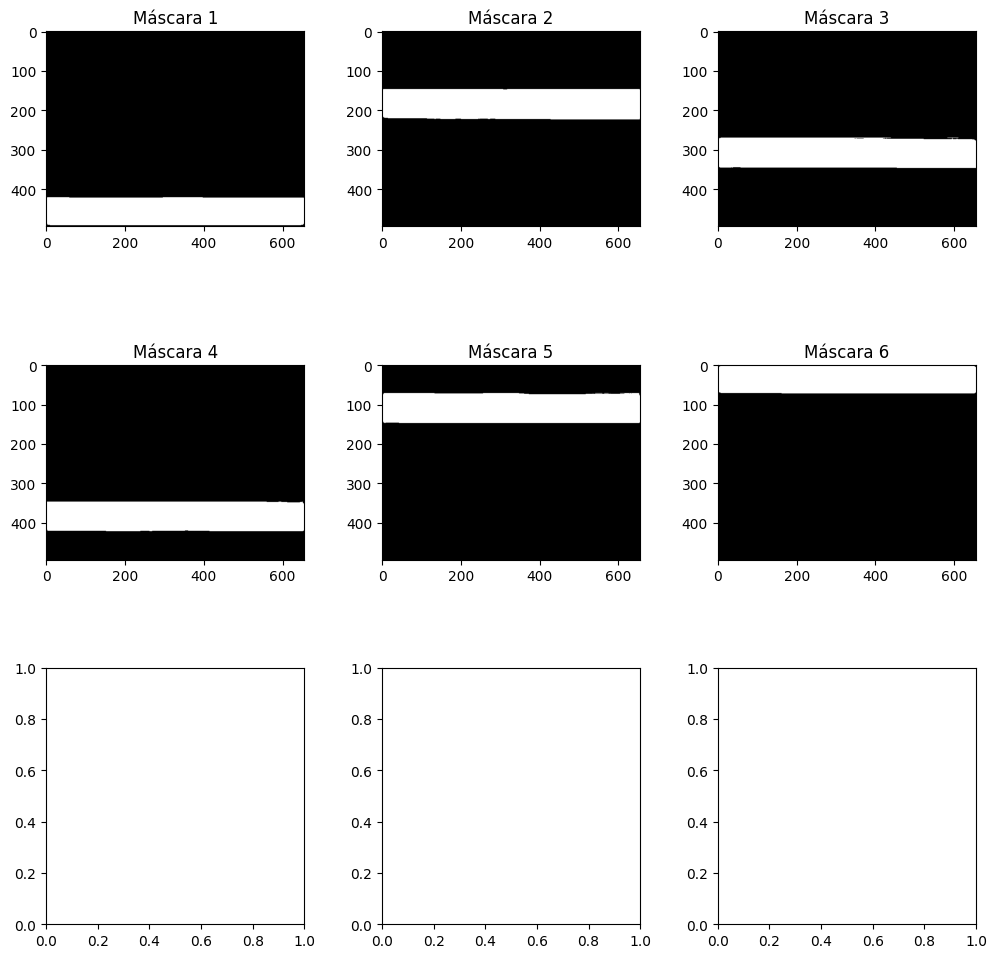

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes una lista de máscaras llamada filtered_masks
# y deseas mostrar las imágenes en una cuadrícula de 3x3
num_rows = 3
num_cols = 3

# Crear una figura y un conjunto de subgráficos
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Iterar sobre las máscaras y mostrarlas en la cuadrícula
for i, mask in enumerate(filtered_masks):
    row = i // num_cols
    col = i % num_cols
    mask_to_show = mask.cpu().numpy()

    axs[row, col].imshow(mask_to_show, cmap='gray')
    axs[row, col].set_title('Máscara ' + str(i + 1))  # +1 para que comience en 1 en lugar de 0

# Ajustar el espaciado entre los subgráficos y mostrar la figura
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


Obteniendo el output de fastSAM

## **OBTENCION DE FALLAS CON SAM**

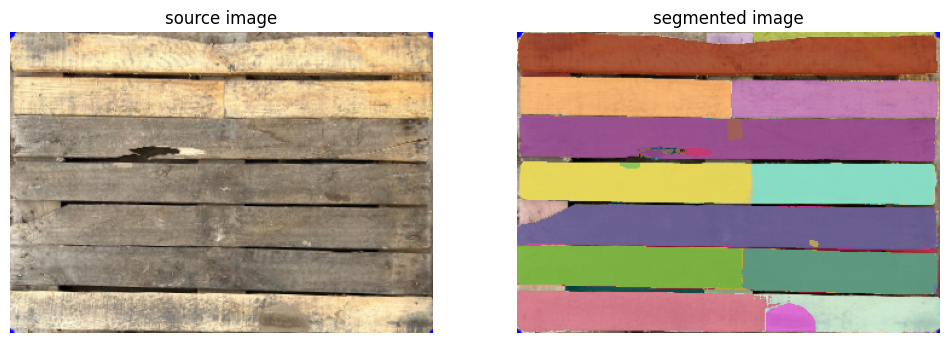

In [29]:
import cv2
import supervision as sv
IMAGE_NAME = "output_image.png"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)


mask_annotator = sv.MaskAnnotator(color_map='index')

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [30]:
filtered_results = [result for result in sam_result if result['area'] > 10000]

for result in filtered_results:
    area = result['area']
    print(f"Área del objeto: {area} píxeles")

Área del objeto: 10676 píxeles
Área del objeto: 11252 píxeles
Área del objeto: 11792 píxeles
Área del objeto: 11808 píxeles
Área del objeto: 11192 píxeles
Área del objeto: 10957 píxeles
Área del objeto: 11431 píxeles
Área del objeto: 10119 píxeles
Área del objeto: 10655 píxeles
Área del objeto: 11324 píxeles
Área del objeto: 11321 píxeles
Área del objeto: 11533 píxeles
Área del objeto: 11579 píxeles
Área del objeto: 11291 píxeles
Área del objeto: 10632 píxeles
Área del objeto: 23847 píxeles


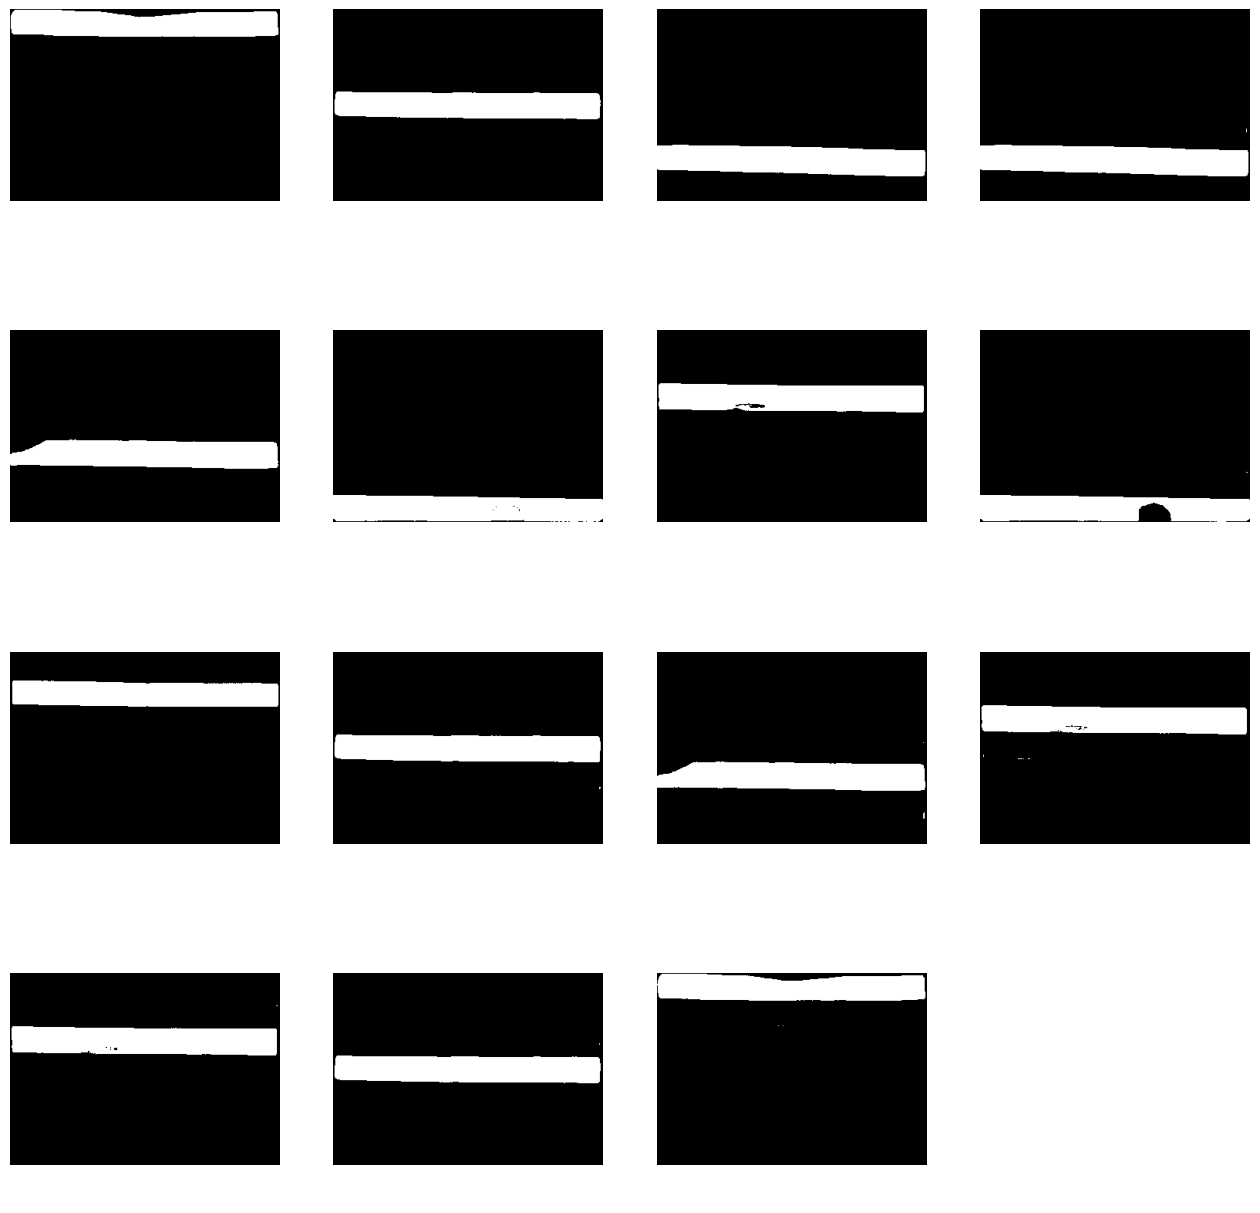

In [31]:
import math
import supervision as sv

# ...

# Filtra las segmentaciones según el área
filtered_results = [result for result in sam_result if 10000 < result['area'] <= 15000]



# Obtén las máscaras de las segmentaciones filtradas
filtered_masks = [result['segmentation'] for result in filtered_results]

# Calcula el tamaño de la cuadrícula para mostrar las máscaras
grid_size_dimension = math.ceil(math.sqrt(len(filtered_masks)))

# Muestra solo las máscaras que cumplen con el criterio de área en una cuadrícula
sv.plot_images_grid(images=filtered_masks, grid_size=(grid_size_dimension, grid_size_dimension), size=(16, 16))


## **FAST SAM SEGMENTATION AND ANOMALIES**

In [32]:
IMAGE_PATH = f"{HOME}/data/output_image.png"

In [33]:
results = fast_sam(
    source=IMAGE_PATH,
    device=DEVICE,
    retina_masks=True,
    imgsz=1024,
    conf=0.2,
    iou=0.6)
prompt_process = FastSAMPrompt(IMAGE_PATH, results, device=DEVICE)
masks = prompt_process.everything_prompt()
prompt_process.plot(annotations=masks, output_path=f"{HOME}/output/palletMalo.png")


image 1/1 /content/data/output_image.png: 736x1024 15 objects, 144.9ms
Speed: 4.1ms preprocess, 144.9ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


In [35]:
import cv2

# Supongamos que tienes una lista de máscaras llamada 'masks'
# Define un valor de área mínimo y máximo (en píxeles)
min_area_threshold = 8000  # Valor mínimo
max_area_threshold = 13000  # Valor máximo

# Lista para almacenar las máscaras filtradas
filtered_masks = []

# Itera a través de las máscaras y filtra por tamaño
for mask in masks:
    # Calcula el área de la máscara
    area = cv2.countNonZero(mask.cpu().numpy())
    print(area)
    if min_area_threshold <= area <= max_area_threshold:
        filtered_masks.append(mask)


11385
5515
11087
5126
608
850
11012
11726
11738
86594
13
11910
23
12294
17


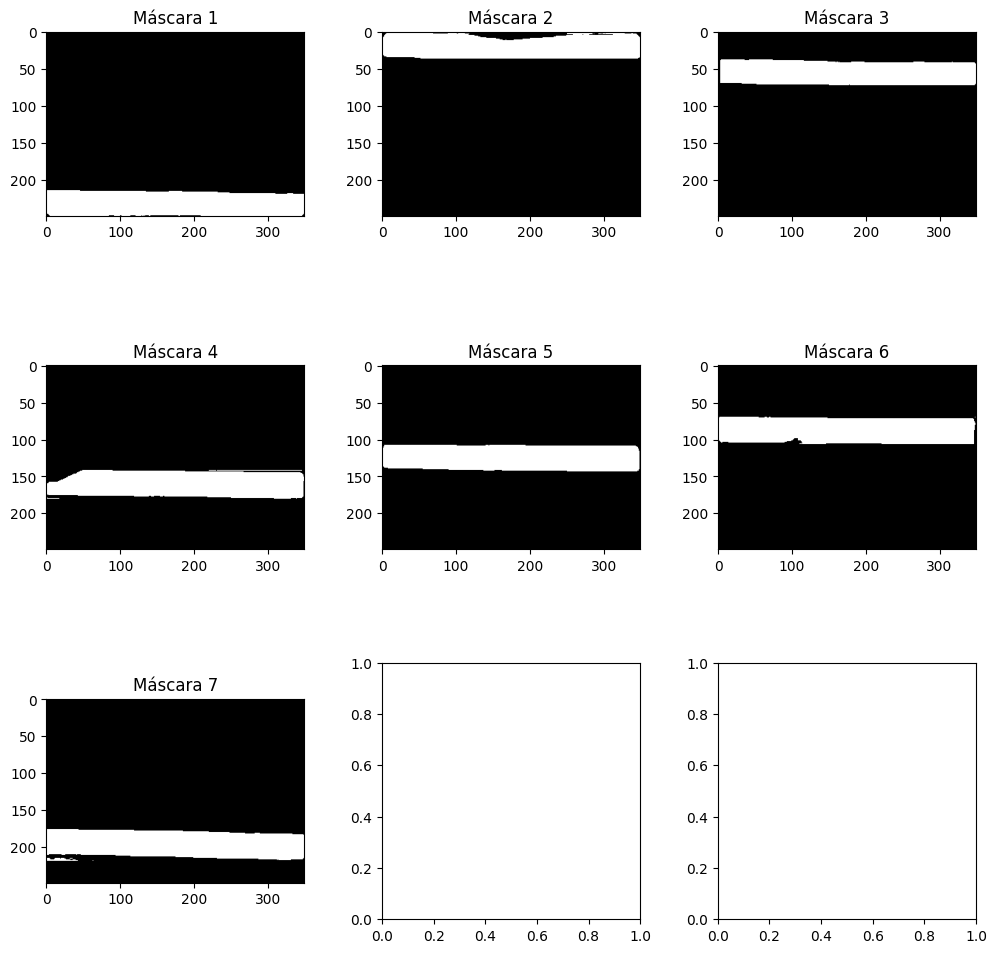

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Supongamos que tienes una lista de máscaras llamada filtered_masks
# y deseas mostrar las imágenes en una cuadrícula de 3x3
num_rows = 3
num_cols = 3

# Crear una figura y un conjunto de subgráficos
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Directorio de salida donde se guardarán las imágenes
output_dir = 'output/'

# Iterar sobre las máscaras y mostrarlas en la cuadrícula
for i, mask in enumerate(filtered_masks):
    if(i==2):
      mascara_2 = mask.cpu().numpy()
    row = i // num_cols
    col = i % num_cols
    mask_to_show = mask.cpu().numpy()

    axs[row, col].imshow(mask_to_show, cmap='gray')
    axs[row, col].set_title('Máscara ' + str(i + 1))  # +1 para que comience en 1 en lugar de 0

    # Guardar la máscara como imagen en formato PNG
    image = Image.fromarray((mask_to_show * 255).astype('uint8'))
    image.save(output_dir + f'mascara_{i + 1}.png')

# Ajustar el espaciado entre los subgráficos y mostrar la figura
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


## **UTILIZACION DE LAS MASCARAS OBTENIDAS POR FASTSAM (las máscaras estan dentro de la carpeta fast sam)**

In [65]:
!pwd
!cd /content/FastSAM/FastSAM/output


/content


In [68]:
!ls
!cd FastSAM
!ls

data  FastSAM  output  sample_data  weights
data  FastSAM  output  sample_data  weights


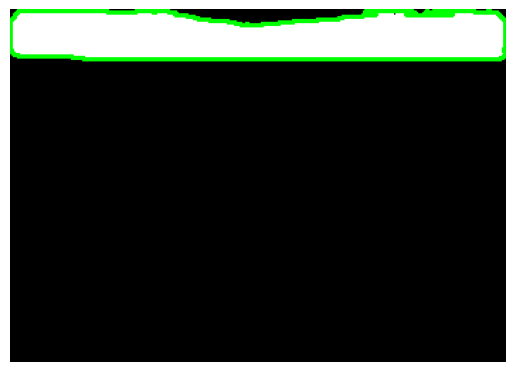

In [83]:

# Abrir la imagen con OpenCV
image = cv2.imread("/content/FastSAM/output/mascara_2.png")

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Encontrar los contornos en la imagen
contours, _ = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar los contornos en la imagen original
contour_image = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

# Mostrar la imagen con los contornos
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

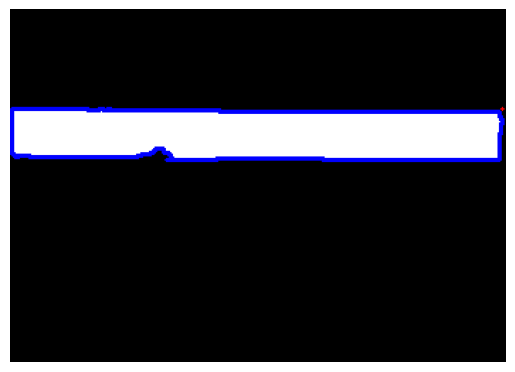

In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para verificar si un contorno es convexo
def is_convex(contour):
    hull = cv2.convexHull(contour)
    return cv2.isContourConvex(hull)

# Abrir la imagen con OpenCV
image = cv2.imread("/content/FastSAM/output/mascara_6.png")

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Encontrar los contornos en la imagen
contours, _ = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Identificar y resaltar objetos convexos y cóncavos
convex_objects = []
concave_objects = []
for contour in contours:
    # Calcula propiedades geométricas
    perimeter = cv2.arcLength(contour, True)
    area = cv2.contourArea(contour)
    approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)

    # Verifica si el contorno es convexo o cóncavo
    if is_convex(contour):
        convex_objects.append(contour)
    else:
        concave_objects.append(contour)

# Dibujar los contornos de objetos convexos en azul y objetos cóncavos en rojo
result_image = image.copy()
cv2.drawContours(result_image, convex_objects, -1, (255, 0, 0), 2)  # Azul
cv2.drawContours(result_image, concave_objects, -1, (0, 0, 255), 2)  # Rojo

# Mostrar la imagen con los objetos convexos y cóncavos resaltados
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [90]:
img  = cv2.imread("/content/FastSAM/output/mascara_6.png")

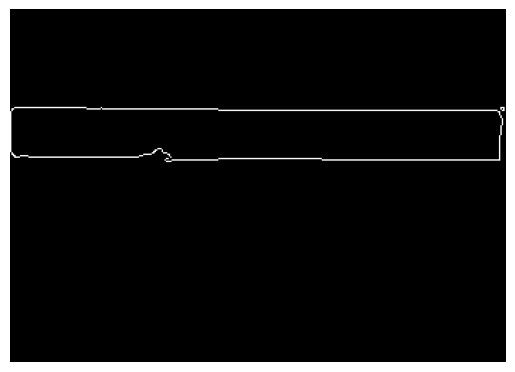

In [101]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
gray_image = cv2.imread("/content/FastSAM/output/mascara_6.png", cv2.IMREAD_GRAYSCALE)

# Aplicar el detector de bordes Canny
canny_image = cv2.Canny(gray_image, 50, 150)

# Crear una imagen en color para dibujar los contornos
image_with_contours = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

# Encontrar los contornos en la imagen Canny
contours, _ = cv2.findContours(canny_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar los contornos en la imagen en color
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Mostrar la imagen con los contornos
plt.imshow(cv2.cvtColor(canny_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


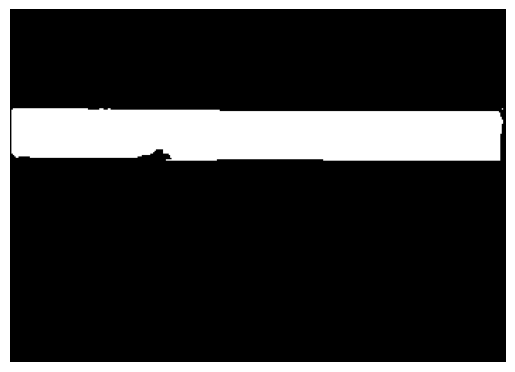

In [105]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
gray_image = cv2.imread("/content/FastSAM/output/mascara_6.png", cv2.IMREAD_GRAYSCALE)

# Aplicar el detector de bordes Canny
canny_image = cv2.Canny(gray_image, 50, 150)

# Encontrar los contornos en la imagen Canny
contours, _ = cv2.findContours(canny_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una copia de la imagen original para dibujar los contornos
image_with_contours = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

for contour in contours:
    # Aproximar el contorno a un polígono con una tolerancia pequeña
    epsilon = 0.1 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Si el polígono aproximado tiene 4 vértices, es un cuadrilátero (posiblemente una tabla)
    if len(approx) == 4:
        # Dibujar un rectángulo alrededor del cuadrilátero
        cv2.drawContours(image_with_contours, [approx], -1, (0, 255, 0), 2)

# Mostrar la imagen con los contornos y cuadriláteros detectados
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()